# Customer Churn Dataset

- **customerID: Customer ID**

- **gender: Whether the customer is a male or a female**

- **SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)**

- **Partner: Whether the customer has a partner or not (Yes, No)**

- **Dependents: Whether the customer has dependents or not (Yes, No)**

- **tenure: Number of months the customer has stayed with the company**

- **PhoneService: Whether the customer has a phone service or not (Yes, No)**

- **MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)**

- **InternetService: Customer’s internet service provider (DSL, Fiber optic, No)**

- **OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)**

- **OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)**

- **DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)**

- **TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)**

- **StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)**

- **StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)**

- **Contract: The contract term of the customer (Month-to-month, One year, Two year)**

- **PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)**

- **PaymentMethodThe: customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))**

- **MonthlyCharges: The amount charged to the customer monthly**

- **TotalCharges: The total amount charged to the customer**

- **Churn: Whether the customer churned or not (Yes or No)**

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read Data

In [2]:
data=pd.read_csv("data/dataset.csv")
data.head()
# data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,NaN,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NaN,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NaN,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NaN,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NaN,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.drop("customerID",axis=1,inplace=True)

# Describe Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7000 non-null float64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              6896 non-null float64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(4), object(16)
memory usage: 1.1+ MB


#### we can see here  that we have 21 columns and thier data types
#### in tenure columns there are null values, and in SeniorCitizen also

In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7000.000000,6896.000000,7043.000000,7043.000000
mean,0.163143,33.041473,64.761692,2283.300440
std,0.369522,24.382260,30.090047,2265.000258
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,10.000000,35.500000,402.225000
50%,0.000000,30.000000,70.350000,1400.550000
75%,0.000000,56.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## describe data and see the min and max of it's values 

# Checking Null Values and their numbers in each column

In [6]:
data.isnull().sum()

gender                0
SeniorCitizen        43
Partner               0
Dependents            0
tenure              147
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

# SO we have to handle these null values by filling them with Max, Min, Mean or Mode.

In [7]:
tenure_mean=data["tenure"].mean()
print("Tenure mean is :",tenure_mean)

Tenure mean is : 33.04147331786543


In [8]:
data["tenure"].fillna(tenure_mean,inplace=True)

In [9]:
data.isnull().sum()

gender               0
SeniorCitizen       43
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
dtype: int64

In [10]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,NaN,Yes,No,33.041473,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,NaN,No,No,34.000000,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,NaN,No,No,2.000000,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,NaN,No,No,45.000000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,NaN,No,No,2.000000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### we have filled the null values in tenure so we are moving forward to fill SeniorCitizen

In [11]:
senior_mode=data["SeniorCitizen"].mode()[0]

In [12]:
data["SeniorCitizen"].fillna(senior_mode,inplace=True)

In [13]:
data["SeniorCitizen"].value_counts()

0.0    5901
1.0    1142
Name: SeniorCitizen, dtype: int64

In [14]:
df=data.copy()

### diffrence between drop and fill na and why not using it

### now we have handled null values at both SeniorCitizen and tenure

# Encoding
   - Label encoding
   - One-Hot Encoding

# Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding one column

In [16]:
gender_labels = LabelEncoder()
gender_enco=gender_labels.fit_transform(data['gender'])
print(gender_enco)

[0 1 1 ... 0 1 1]


# to inverse Encoding

In [17]:
gender_labels.inverse_transform(gender_enco)

array(['Female', 'Male', 'Male', ..., 'Female', 'Male', 'Male'],
      dtype=object)

### Encoidng data in our dataframe

In [18]:
obj_cols=[]
for i in data.columns:
    if data[i].dtype == "object":
        print("( ",i," )","Unique values are:",data[i].unique())
        print("--------------------------------------------")
        obj_cols.append(i)
print(obj_cols)

(  gender  ) Unique values are: ['Female' 'Male']
--------------------------------------------
(  Partner  ) Unique values are: ['Yes' 'No']
--------------------------------------------
(  Dependents  ) Unique values are: ['No' 'Yes']
--------------------------------------------
(  PhoneService  ) Unique values are: ['No' 'Yes']
--------------------------------------------
(  MultipleLines  ) Unique values are: ['No phone service' 'No' 'Yes']
--------------------------------------------
(  InternetService  ) Unique values are: ['DSL' 'Fiber optic' 'No']
--------------------------------------------
(  OnlineSecurity  ) Unique values are: ['No' 'Yes' 'No internet service']
--------------------------------------------
(  OnlineBackup  ) Unique values are: ['Yes' 'No' 'No internet service']
--------------------------------------------
(  DeviceProtection  ) Unique values are: ['No' 'Yes' 'No internet service']
--------------------------------------------
(  TechSupport  ) Unique values are

## Now We knew what columns we are going to Encode their values

In [19]:
gender_labels= LabelEncoder()
Partner_labels = LabelEncoder()
Dependents_labels = LabelEncoder()
Phone_labels = LabelEncoder()
MultipleLines_labels = LabelEncoder()
InternetService_labels = LabelEncoder()
OnlineSecurity_labels = LabelEncoder()
OnlineBackup_labels = LabelEncoder()
DeviceProtection_labels = LabelEncoder()
TechSupport_labels = LabelEncoder()
StreamingTV_labels = LabelEncoder()
StreamingMovies_labels = LabelEncoder()
Contract_labels = LabelEncoder()
PaperlessBilling_labels = LabelEncoder()
PaymentMethod_labels = LabelEncoder()
Churn_labels=LabelEncoder()
PhoneService_labels=LabelEncoder()

In [20]:
data['gender']       =gender_labels.fit_transform(data['gender'])
data['Partner']      =Partner_labels.fit_transform(data['Partner'])
data['Dependents']   =Dependents_labels.fit_transform(data['Dependents'])
data['MultipleLines']=MultipleLines_labels.fit_transform(data['MultipleLines'])
data['InternetService']=InternetService_labels.fit_transform(data['InternetService'])
data['OnlineSecurity']=OnlineSecurity_labels.fit_transform(data['OnlineSecurity'])
data['OnlineBackup']=OnlineBackup_labels.fit_transform(data['OnlineBackup'])
data['DeviceProtection']=Dependents_labels.fit_transform(data['DeviceProtection'])
data['TechSupport']=TechSupport_labels.fit_transform(data['TechSupport'])
data['StreamingTV']=StreamingTV_labels.fit_transform(data['StreamingTV'])
data['StreamingMovies']=StreamingMovies_labels.fit_transform(data['StreamingMovies'])
data['Contract']=Contract_labels.fit_transform(data['Contract'])
data['PaperlessBilling']=PaperlessBilling_labels.fit_transform(data['PaperlessBilling'])
data['PaymentMethod']=PaymentMethod_labels.fit_transform(data['PaymentMethod'])
data['Churn']=Churn_labels.fit_transform(data['Churn'])
data['PhoneService']=Phone_labels.fit_transform(data["PhoneService"])

In [21]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,33.041473,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0.0,0,0,34.000000,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0.0,0,0,2.000000,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0.0,0,0,45.000000,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0.0,0,0,2.000000,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [22]:
df2=df.copy()

In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,Yes,No,33.041473,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0.0,No,No,34.000000,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0.0,No,No,2.000000,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45.000000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2.000000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Another way to encode data

In [24]:
encs = {}
for col in df.columns:
    if df[col].dtype == "object":
        encs[col] = LabelEncoder()
        df[col]   =encs[col].fit_transform(df[col])

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,33.041473,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0.0,0,0,34.000000,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0.0,0,0,2.000000,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0.0,0,0,45.000000,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0.0,0,0,2.000000,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [26]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,Yes,No,33.041473,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0.0,No,No,34.000000,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0.0,No,No,2.000000,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45.000000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2.000000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### to On-hot encode data we have to label encode it first

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
gender_labelEnco=LabelEncoder()
gender_ohEnco=OneHotEncoder()
df2['gender']=gender_labelEnco.fit_transform(df2['gender'])

gender_values=gender_ohEnco.fit_transform(df2['gender'].values.reshape(-1,1)).toarray()
cols_gender=gender_labelEnco.inverse_transform(df2['gender'].unique())


for i in range(len(cols_gender)):
    df2[cols_gender[i]]=gender_values[:,i]

/home/abdo/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [29]:
gender_values, cols_gender

(array([[1., 0.],
        [0., 1.],
        [0., 1.],
        ...,
        [1., 0.],
        [0., 1.],
        [0., 1.]]), array(['Female', 'Male'], dtype=object))

In [30]:
l=np.array([10,50,20,30])
l.reshape(-1,1)

array([[10],
       [50],
       [20],
       [30]])

In [31]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Male
0,0,0.0,Yes,No,33.041473,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1.0,0.0
1,1,0.0,No,No,34.000000,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,0.0,1.0
2,1,0.0,No,No,2.000000,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.0,1.0
3,1,0.0,No,No,45.000000,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.0,1.0
4,0,0.0,No,No,2.000000,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1.0,0.0


In [32]:
contract_labelEnco=LabelEncoder()
contract_ohEnco=OneHotEncoder()
df2['Contract']=contract_labelEnco.fit_transform(df2['Contract'])

contract_values=contract_ohEnco.fit_transform(df2['Contract'].values.reshape(-1,1)).toarray()
cols_contract=contract_labelEnco.inverse_transform(df2['Contract'].unique())


for i in range(len(cols_contract)):
    df2[cols_contract[i]]=contract_values[:,i]

/home/abdo/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [33]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,Male,Month-to-month,One year,Two year
0,0,0.0,Yes,No,33.041473,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,No,1.0,0.0,1.0,0.0,0.0
1,1,0.0,No,No,34.000000,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,No,0.0,1.0,0.0,1.0,0.0
2,1,0.0,No,No,2.000000,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,Yes,0.0,1.0,1.0,0.0,0.0
3,1,0.0,No,No,45.000000,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,No,0.0,1.0,0.0,1.0,0.0
4,0,0.0,No,No,2.000000,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,Yes,1.0,0.0,1.0,0.0,0.0


# Scale data

In [34]:
from sklearn.preprocessing import StandardScaler,Normalizer

In [35]:
sc_tenure=StandardScaler()

In [36]:
data["tenure"]=sc_tenure.fit_transform(data["tenure"].values.reshape(-1,1))

In [37]:
sc_total=StandardScaler()
data["TotalCharges"]=sc_total.fit_transform(data["TotalCharges"].values.reshape(-1,1))

In [38]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,29.85,-0.994971,0
1,1,0.0,0,0,0.039732,1,0,0,2,0,2,0,0,0,1,0,3,56.95,-0.173876,0
2,1,0.0,0,0,-1.286708,1,0,0,2,2,0,0,0,0,0,1,3,53.85,-0.960399,1
3,1,0.0,0,0,0.495696,0,1,0,2,0,2,2,0,0,1,0,0,42.30,-0.195400,0
4,0,0.0,0,0,-1.286708,1,0,1,0,0,0,0,0,0,0,1,2,70.70,-0.941193,1


# After encoding and scaling our data we are going to see our correlation map

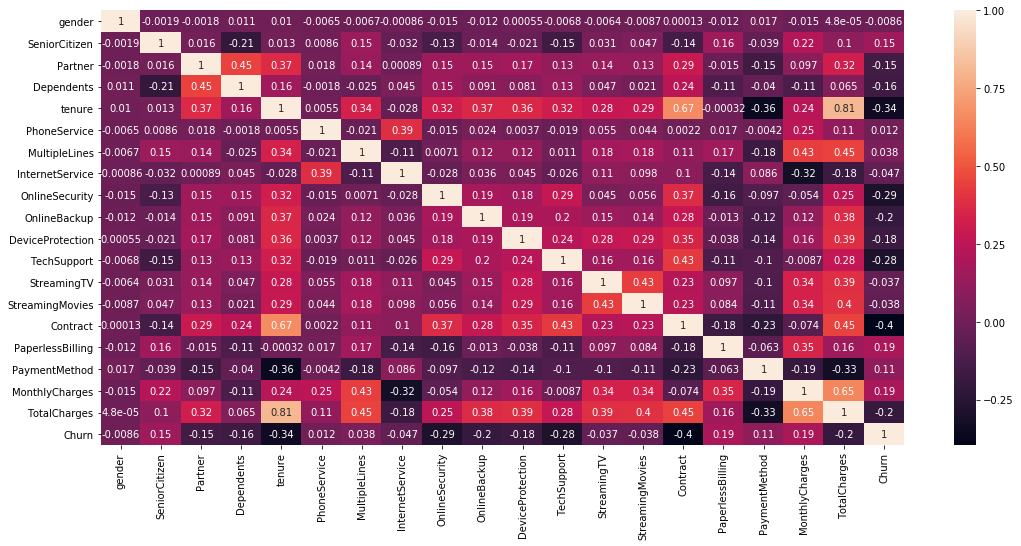

In [39]:
plt.figure(figsize=(18,8))
sns.heatmap(data.corr(),annot=True);

# Spliting Data:
   - Select columns for modeling
   - split into train and test sets

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X=data.drop('Churn',axis=1).values
y=data['Churn'].values

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33)

In [43]:
X_train

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  9.09500000e+01,  1.84794536e+00],
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         2.00000000e+00,  6.90000000e+01,  6.99385378e-02],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.00000000e+00,  7.00500000e+01, -9.77221779e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.00000000e+00,  1.88500000e+01, -9.36093036e-01],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.00000000e+00,  5.61000000e+01, -5.90042017e-01],
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.98500000e+01, -4.48707496e-01]])